In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
import datetime as dt
rcParams['figure.figsize']=10,6
import seaborn as sns
from scipy.stats import boxcox

# Gold NYSE historical data from yahoo.finance

In [4]:
# Import Gold data in panda and passed to a variable name "df"
df = pd.read_csv("Gold.csv", parse_dates= True, index_col='Date')

In [5]:
# Getting a peek into data 
# using round function to see only upto 2 decimal digits
df.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,17.9375,17.9375,17.6875,17.6875,14.105929,557700
2000-01-03,17.5625,18.1875,17.4375,17.6875,14.105929,1509900


In [6]:
# print columns and index
print(df.columns)
print(df.index)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
DatetimeIndex(['1999-12-31', '2000-01-03', '2000-01-04', '2000-01-05',
               '2000-01-06', '2000-01-07', '2000-01-10', '2000-01-11',
               '2000-01-12', '2000-01-13',
               ...
               '2019-05-16', '2019-05-17', '2019-05-20', '2019-05-21',
               '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-28',
               '2019-05-29', '2019-05-30'],
              dtype='datetime64[ns]', name='Date', length=4883, freq=None)


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4883.000000,4883.000000,4883.000000,4883.000000,4883.000000,4.883000e+03
mean,24.930121,25.297064,24.521096,24.895021,22.105161,9.031155e+06
std,11.981597,12.135533,11.780259,11.952285,10.594183,7.450148e+06
min,6.080000,6.230000,5.910000,5.940000,5.744994,2.377000e+05
25%,15.900000,16.127499,15.650000,15.900000,13.537093,3.018050e+06
50%,19.950001,20.219999,19.629999,19.889999,17.886133,7.398600e+06
75%,33.500000,34.050001,32.825001,33.465000,29.656831,1.268015e+07
max,55.540001,55.950001,55.090000,55.630001,49.995968,7.445820e+07


In [8]:
# creating  new features
# instead of dealing with High and Low separately, created volatility % as new features
# f03 is on daily return
df['f01'] = (df.High - df.Low)/(df.Low)*100
df['f02'] = (df.Close - df.Open)/(df.Open)*100
df['f03'] = (df.Close) / (df.Open)-1

In [9]:
df = df[['Close', 'f01', 'f02', 'f03']]
df.head(5)

,Close,f01,f02,f03
Date,,,,
1999-12-31,17.6875,1.413428,-1.393728,-0.013937
2000-01-03,17.6875,4.301075,0.711744,0.007117
2000-01-04,17.4375,3.284672,0.722022,0.007220
2000-01-05,17.7500,2.508961,1.067616,0.010676
2000-01-06,17.7500,1.785714,0.000000,0.000000


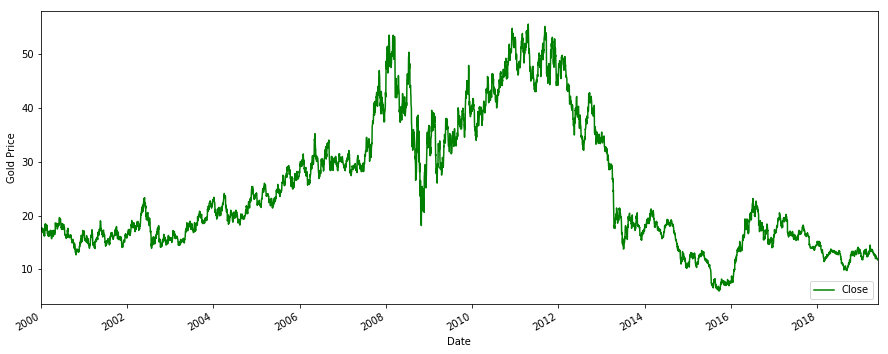

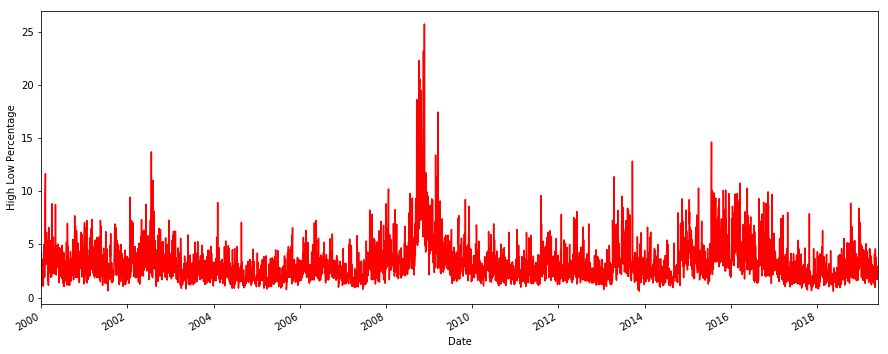

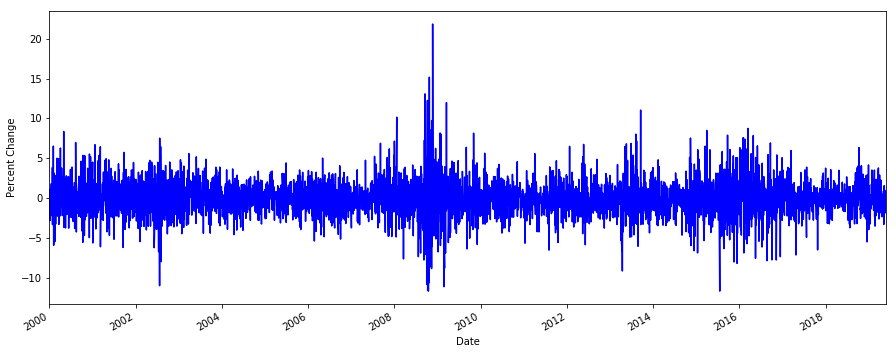

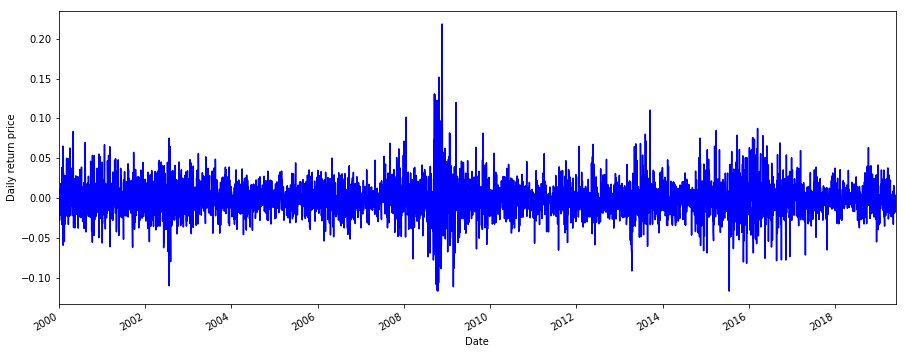

In [9]:
# Visualization

df['Close'].plot(figsize=(15,6), color="green")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.show()

df['f01'].plot(figsize=(15,6), color="red")
plt.xlabel('Date')
plt.ylabel('High Low Percentage')
plt.show()

df['f02'].plot(figsize=(15,6), color="blue")
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.show()

df['f03'].plot(figsize=(15,6), color="blue")
plt.xlabel('Date')
plt.ylabel('Daily return price')
plt.show()

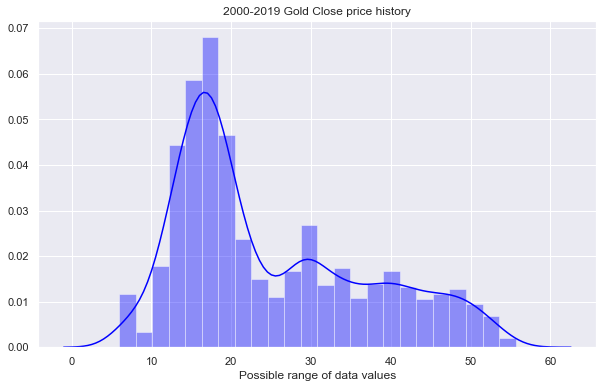

In [10]:
sns.set()
sns.distplot(df['Close'], color='blue') #density plot
plt.title("2000-2019 Gold Close price history")
plt.xlabel('Possible range of data values')
plt.show()


# random series with white noise here, with no relation betweer past and future values
# average would be the best forecast for this kind of series

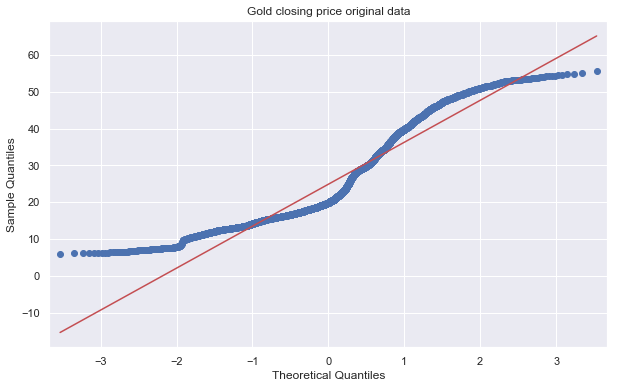

In [11]:
from statsmodels.graphics.gofplots import qqplot
# q-q plot
qqplot(df.Close, line='r', ax=plt.gca())
plt.title('Gold closing price original data')
plt.show()

In [12]:
# creating a variable called forecast_out, to store the number of days (30 days) into the future that I want to predict.

# creating a forecast column (prediction)
prediction = 'Close'

# Chosing 30 days as number of forecast days
forecast_out = int(30)
print('length =',len(df), "and forecast_out =", forecast_out)

length = 4883 and forecast_out = 30


In [13]:
# Creating label by shifting 'Close' according to 'forecast_out'
df['label'] = df[prediction].shift(-forecast_out)
print(df.head(2))
print('\n')
# the tail consists of n(=forecast_out) rows with NAN in Label column 
print(df.tail(2))

              Close       f01       f02       f03   label
Date                                                     
1999-12-31  17.6875  1.413428 -1.393728 -0.013937  17.500
2000-01-03  17.6875  4.301075  0.711744  0.007117  17.875


            Close       f01       f02       f03  label
Date                                                  
2019-05-29  11.75  2.046036  0.170503  0.001705    NaN
2019-05-30  11.79  1.801029  0.255102  0.002551    NaN


In [14]:
# Defining features Matrix X by excluding the label column 
X = np.array(df.drop(['label'], 1))

from sklearn import preprocessing

# Using feature in sklearn, preposessing to scale features
X = preprocessing.scale(X)
print(X[1,:])

[-0.60308623  0.55532283  0.36039773  0.36039773]


In [15]:
# X contains last 'n= forecast_out' rows for which label data available
# Puting those rows in different Matrix X_forecast_out by X_forecast_out = X[end-forecast_out:end]

X_forecast_out = X[-forecast_out:]
X = X[:-forecast_out]
print ("Length of X_forecast_out:", len(X_forecast_out), "& Length of X :", len(X))

Length of X_forecast_out: 30 & Length of X : 4853


In [16]:
# Similarly Define Label vector y for the data we have prediction for
# A good test is to make sure length of X and y are identical
y = np.array(df['label'])
y = y[:-forecast_out]
print('Length of y: ',len(y))

Length of y:  4853


# Linear regression

In [17]:
# I have now new cleaned and processed data sets ‘X’ & ‘y’.
# Creating Training and Test Sets

from sklearn.model_selection import train_test_split

# split into test and train data), test_size = 0.2 ==> 20% data is test data

# Split the data into 80% training and 20% testing
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('length of X_train and x_test: ', len(X_train), len(X_test))

length of X_train and x_test:  3882 971


In [18]:
# testing the accuracy of model on the test data
from sklearn.linear_model import LinearRegression
# Train
lm = LinearRegression()
lm.fit(X_train,y_train) # y_train(dependent) = m1*Close + m2*f01 +m3*f02 +m3*f03 + constant

# Test
accuracy = lm.score(X_test, y_test)
print("Accuracy of Linear Regression: ", accuracy)

Accuracy of Linear Regression:  0.91969565824753


In [21]:
lm_confidence = lm.score(X_test, y_test)
print("lm confidence: ", lm_confidence)

# with R2= 91.96% the model will be better to use to predict the future Gold price 

lm confidence:  0.91969565824753


In [22]:
print('intercept:', lm.intercept_)

print('slope:', lm.coef_)


intercept: 24.833822966168178
slope: [ 1.14496304e+01  5.28540307e-02 -9.17355284e+12  9.17355284e+12]


# prediction

In [23]:
import scipy.stats as stats
import random
import math
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Predict prices
predicted_price = lm.predict(X_test)

# Calculate R square and rmse to check goodness of fit
r2_score = lm.score(X_test, y_test)*100
print("R square for regression", float("{0:.2f}".format(r2_score)))
sqrt(mean_squared_error(y_test,predicted_price))

R square for regression 91.97


3.409687801720215

In [24]:
# Predict prices
y_pred = lm.intercept_ + lm.coef_ * y
print('predicted response:', y_pred, sep='\n')

# The output here differs from the previous one in dimensions. 
# The predicted response is now a two-dimensional array, while in the previous case, it had one dimension.

predicted response:
[[ 1.79287086e+01  2.47840950e+01  5.32310834e+12 -5.32310834e+12]
 [ 1.79287086e+01  2.48631740e+01 -3.30612759e+12  3.30612759e+12]
 [ 1.76891978e+01  2.48353395e+01 -3.34825132e+12  3.34825132e+12]
 ...
 [ 1.38402602e+01  2.47946199e+01  1.73765377e+12 -1.73765377e+12]
 [ 1.40414492e+01  2.48215153e+01 -9.61294673e+12  9.61294673e+12]
 [ 1.37157146e+01  2.48180004e+01  6.28500190e+12 -6.28500190e+12]]


In [28]:
# @ 0.92 this Linear Regression model did fairly well on the test data set
# Using this model will predict Gold price for the next 30 days.

FP = lm.predict(X_forecast_out)
print(FP)

[13.68552661 13.64859998 13.52352031 13.23962371 13.18825614 13.26017785
 13.3264542  13.2324145  13.04612636 13.10245329 12.94235776 13.01436906
 12.99028053 13.11509634 13.20163962 12.93768513 12.71122475 12.6685299
 12.80399393 12.93878779 12.77879405 12.61263082 12.62369247 12.56431602
 12.52438661 12.4484451  12.40836032 12.12145522 12.18607406 12.18191961]


In [29]:
df.head()

,Close,f01,f02,f03,label
Date,,,,,
1999-12-31,17.6875,1.413428,-1.393728,-0.013937,17.5000
2000-01-03,17.6875,4.301075,0.711744,0.007117,17.8750
2000-01-04,17.4375,3.284672,0.722022,0.007220,17.8750
2000-01-05,17.7500,2.508961,1.067616,0.010676,17.3125
2000-01-06,17.7500,1.785714,0.000000,0.000000,17.9375


# test another model with moving average

In [30]:
# Define exploratory variables
# Finding moving average of past 30 days and 100 days and creating 2 more columns
df['s01'] = df.Close.rolling(window=30).mean().fillna(0)
df['s02'] = df.Close.rolling(window=100).mean().fillna(0)

In [31]:
df1 = df[['Close','f01', 'f02', 'f03', 's01', 's02']]
df1.head()

,Close,f01,f02,f03,s01,s02
Date,,,,,,
1999-12-31,17.6875,1.413428,-1.393728,-0.013937,0.0,0.0
2000-01-03,17.6875,4.301075,0.711744,0.007117,0.0,0.0
2000-01-04,17.4375,3.284672,0.722022,0.007220,0.0,0.0
2000-01-05,17.7500,2.508961,1.067616,0.010676,0.0,0.0
2000-01-06,17.7500,1.785714,0.000000,0.000000,0.0,0.0


In [32]:
df1.tail()

,Close,f01,f02,f03,s01,s02
Date,,,,,,
2019-05-23,11.96,2.341137,-0.499168,-0.004992,12.662667,12.8972
2019-05-24,11.95,2.127660,-0.416667,-0.004167,12.612667,12.8813
2019-05-28,11.74,1.716738,0.341880,0.003419,12.556667,12.8677
2019-05-29,11.75,2.046036,0.170503,0.001705,12.494000,12.8552
2019-05-30,11.79,1.801029,0.255102,0.002551,12.444000,12.8422


In [33]:
# creating another variable forecast_out1 to store the number of days (30 days) into the future that I want to predict.

# creating forecast columns (prediction)
prediction1 = 'Close'

# Chosing 30 days as number of forecast days
forecast_out1 = int(30)
print('length =',len(df1), "and forecast_out1 =", forecast_out1)


length = 4883 and forecast_out1 = 30


In [34]:
# Creating label1 by shifting 'Close' according to 'forecast_out1' 
df1['label1'] = df1[prediction1].shift(-forecast_out1)
print(df1.head(2))
print('\n')

# the tail consists of n(=forecast_out1) rows with NAN in Label column 
print(df1.tail(2))


              Close       f01       f02       f03  s01  s02  label1
Date                                                               
1999-12-31  17.6875  1.413428 -1.393728 -0.013937  0.0  0.0  17.500
2000-01-03  17.6875  4.301075  0.711744  0.007117  0.0  0.0  17.875


            Close       f01       f02       f03     s01      s02  label1
Date                                                                    
2019-05-29  11.75  2.046036  0.170503  0.001705  12.494  12.8552     NaN
2019-05-30  11.79  1.801029  0.255102  0.002551  12.444  12.8422     NaN


In [35]:
# Defining features Matrix X1 by excluding the label1 column 
X1 = np.array(df1.drop(['label1', 'Close'], 1))

from sklearn import preprocessing

# Using feature in sklearn, preposessing to scale features
X1 = preprocessing.scale(X1)
print(X1[1,:])

[ 0.55532283  0.36039773  0.36039773 -2.07020951 -2.02550055]


In [36]:
# X1 contains last 'n= forecast_out1' rows for which label data available
# Puting those rows in different Matrix X1_forecast_out1 by X1_forecast_out1 = X1[end-forecast_out1:end]

X1_forecast_out1 = X1[-forecast_out1:]
X1 = X1[:-forecast_out1]
print ("Length of X1_forecast_out1:", len(X1_forecast_out1), "& Length of X1 :", len(X1))

Length of X1_forecast_out1: 30 & Length of X1 : 4853


In [37]:
# Similarly Define Label vector y1 for the data we have prediction for
# A good test is to make sure length of X1 and y1 are identical
y1 = np.array(df1['Close'])
y1 = y1[:-forecast_out1]
print('Length of y1: ',len(y1))

Length of y1:  4853


# Linear regression_2 (short & long window MA)

In [38]:
# Split the data into 80% training and 20% testing

X1_train,X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)
print('length of X1_train and X1_test: ', len(X1_train), len(X1_test))

length of X1_train and X1_test:  3882 971


In [39]:
# testing the accuracy of model on the test data

# Train
lm1 = LinearRegression().fit(X1_train, y1_train)
print("Gold Price =", round(lm1.coef_[0], 2), "* 30 days Moving Average", round(
    lm1.coef_[1], 2), "* 100 days Moving Average +", round(lm1.intercept_, 2))

# Test
accuracy = lm1.score(X1_test, y1_test)
print("Accuracy of Linear Regression: ", accuracy)

# Predict prices
predicted_price = lm1.predict(X1_test)

# Calculate R square and rmse to check goodness of fit
r2_score = lm1.score(X1_test, y1_test)*100
print("R square for regression", float("{0:.2f}".format(r2_score)))
sqrt(mean_squared_error(y1_test,predicted_price))

# this time with short and long window, model provides almost 97% accuracy

Gold Price = -0.2 * 30 days Moving Average -39739184105682.24 * 100 days Moving Average + 24.91
Accuracy of Linear Regression:  0.9645466336843158
R square for regression 96.45


2.2767532919963474

In [42]:
# @ 96% this Linear Regression model did better than earlier on the test data set
# Using this model will predict Gold price for the next 30 days.

FP = lm1.predict(X1_forecast_out1)
print(FP)

[13.7058005  14.05638643 13.27220675 13.93333956 13.74095675 13.82158419
 13.96654268 13.20970675 13.86400362 13.38744112 13.82005831 13.65306612
 13.81273409 14.10228487 13.10814425 13.10033175 12.59251925 13.89720675
 13.7839255  13.33568331 12.98314425 13.68626925 13.34740206 13.24965426
 12.66283175 13.02220675 12.92845675 12.98900362 13.00072237 12.8620505 ]


# Checking if ARIMA model gives better accuracy result 

In [84]:
from plotly.graph_objs import *
from plotly.offline import iplot, iplot_mpl

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
import datetime as dt
rcParams['figure.figsize']=10,6
import seaborn as sns
from scipy.stats import boxcox

In [2]:
DF = pd.read_csv("Gold.csv", index_col=0, parse_dates = True)
DF.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,17.9375,17.9375,17.6875,17.6875,14.105929,557700
2000-01-03,17.5625,18.1875,17.4375,17.6875,14.105929,1509900


In [3]:
# Import Gold data in panda and passed to a variable name "df"
DF = DF.resample('M').mean() 
DF= pd.DataFrame(DF)
DF.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,17.937500,17.937500,17.687500,17.687500,14.105929,5.577000e+05
2000-01-31,17.171875,17.387500,16.934375,17.115625,13.649853,1.515390e+06
2000-02-29,17.493750,17.828125,17.053125,17.390625,13.869167,2.071065e+06
2000-03-31,16.472826,16.709239,16.198370,16.448370,13.117711,1.512465e+06
2000-04-30,16.644737,16.990132,16.424342,16.717105,13.332030,1.846863e+06


In [4]:
DF.index

DatetimeIndex(['1999-12-31', '2000-01-31', '2000-02-29', '2000-03-31',
               '2000-04-30', '2000-05-31', '2000-06-30', '2000-07-31',
               '2000-08-31', '2000-09-30',
               ...
               '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31',
               '2019-04-30', '2019-05-31'],
              dtype='datetime64[ns]', name='Date', length=234, freq='M')

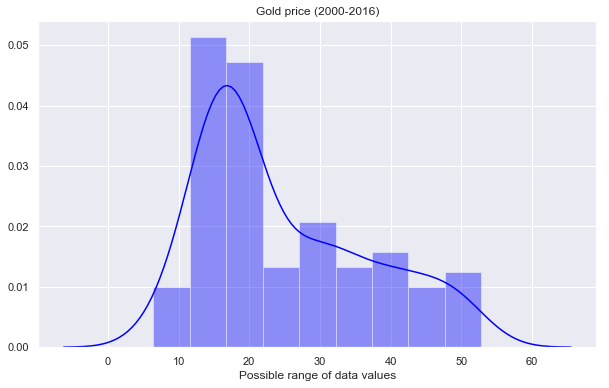

In [5]:
plt.rcParams['figure.figsize']=10,6
sns.set()
sns.distplot(DF.Close, color='blue') #density plot
plt.title("Gold price (2000-2016)")
plt.xlabel('Possible range of data values')
plt.show()

In [6]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Text(0.5, 1.0, 'Plot on Gold raw data (2000-2016)')

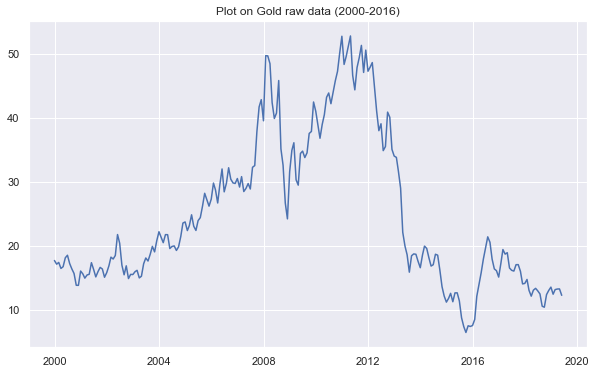

In [7]:
plt.plot(DF.Close)
plt.title('Plot on Gold raw data (2000-2016)')

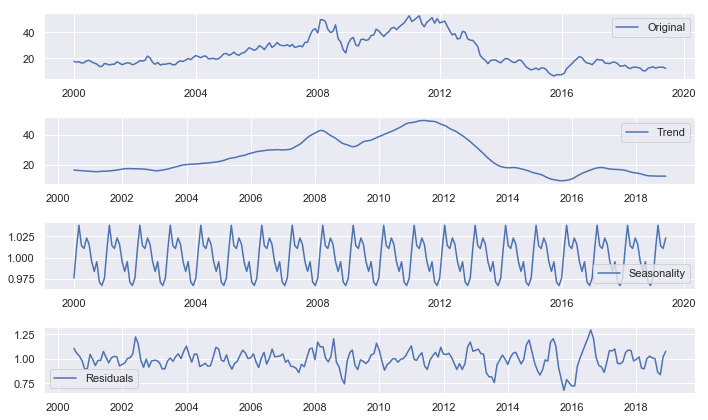

In [9]:
# Multiplicative Decomposition on raw data 
# Here is what our time series looks like when broken down into trend, seasonality & residual
rcParams['figure.figsize']=10,6
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(DF.Close, model='multiplicative')

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(DF.Close, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


# Diagnostic part- model estimation

Text(0.5, 1.0, 'Auto correlation on orginal data (2000-2016)')

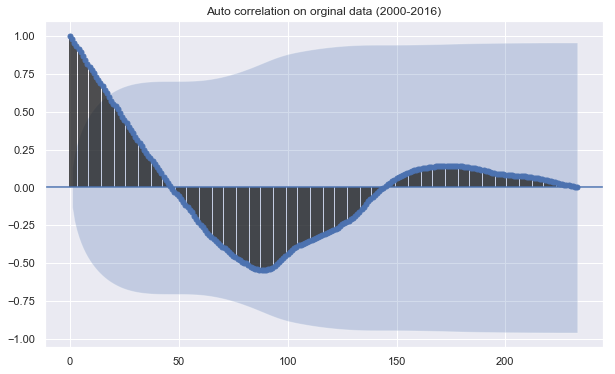

In [10]:
# plotted on original data shows gradual decay which established stationarity
rcParams['figure.figsize']=10,6
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(DF.Close)
plt.title('Auto correlation on orginal data (2000-2016)')

C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


Text(0.5, 1.0, 'Partial auto correlation_orginal data (2000-2016)')

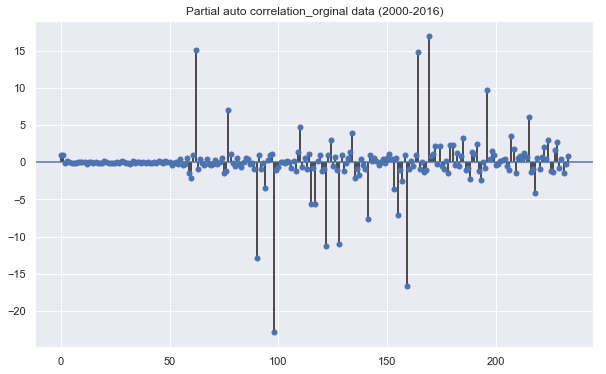

In [11]:
plot_pacf(DF.Close)
plt.title('Partial auto correlation_orginal data (2000-2016)')

# stationarity

In [12]:
DF.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,17.937500,17.9375,17.687500,17.687500,14.105929,557700.0
2000-01-31,17.171875,17.3875,16.934375,17.115625,13.649853,1515390.0


In [13]:
DF['Close_diff'] = DF['Close']-DF['Close'].shift() # differencing
DF['Close_log'] = np.log1p(DF['Close'])-np.log1p(DF.shift()['Close']) # logarithm to eliminate trend

Text(0.5, 1.0, 'Differenced data')

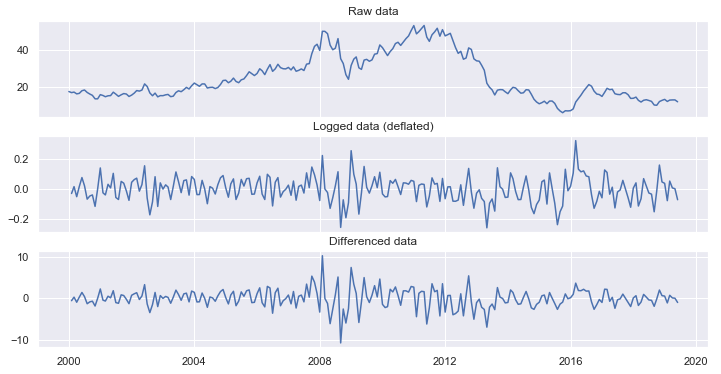

In [14]:
# comparing through visual display
fig, ax = plt.subplots(3, sharex=True, figsize=(12,6))
ax[0].plot(DF.Close)
ax[0].set_title("Raw data")
ax[1].plot(DF.Close_log)
ax[1].set_title("Logged data (deflated)")
ax[2].plot(DF.Close_diff)
ax[2].set_title("Differenced data")

In [15]:
from statsmodels.tsa.stattools import adfuller  # stationary test

print(" > Is the Orginal data stationary ?")
dftest = adfuller(DF.Close, autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the differenced data stationary ?")
dftest = adfuller(DF.Close_diff.fillna(0), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the logarithm transformed data stationary ?")
dftest = adfuller(DF.Close_log.fillna(0), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))



 > Is the Orginal data stationary ?
Test statistic = -1.525
P-value = 0.521
Critical values :
	1%: -3.460154163751041 - The data is not stationary with 99% confidence
	5%: -2.874648939216792 - The data is not stationary with 95% confidence
	10%: -2.5737567259151044 - The data is not stationary with 90% confidence

 > Is the differenced data stationary ?
Test statistic = -11.659
P-value = 0.000
Critical values :
	1%: -3.458854867412691 - The data is  stationary with 99% confidence
	5%: -2.8740800599399323 - The data is  stationary with 95% confidence
	10%: -2.573453223097503 - The data is  stationary with 90% confidence

 > Is the logarithm transformed data stationary ?
Test statistic = -10.853
P-value = 0.000
Critical values :
	1%: -3.458854867412691 - The data is  stationary with 99% confidence
	5%: -2.8740800599399323 - The data is  stationary with 95% confidence
	10%: -2.573453223097503 - The data is  stationary with 90% confidence


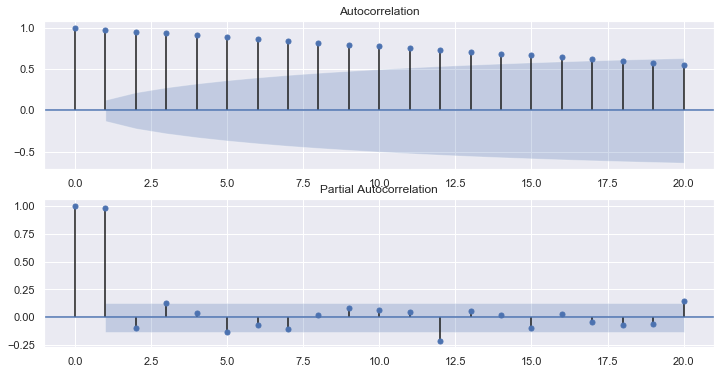

In [16]:
fig, ax = plt.subplots(2, figsize=(12,6)) # plotting acf & pacf on original data
ax[0] = plot_acf(DF.Close.dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(DF.Close.dropna(), ax=ax[1], lags=20)

# Trend and Seasonality estimation using decomposition

In [17]:
DF ['Close_diff_MA'] = (DF['Close_diff'].rolling(window=12).mean()).fillna(0) # MA on logarithm scale vales
DF['Sub_Close_diff_MA'] = (DF['Close_diff'] - DF['Close_diff_MA']).fillna(0) # subtractig above from logarithm values

In [18]:
print("\n > Is the moving average of differenced data stationary ?")
dftest = adfuller(DF.Close_diff_MA.fillna(0), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

print("\n > Is the (differenced-moving average) data stationary ?")
dftest = adfuller(DF.Sub_Close_diff_MA.fillna(0), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))



 > Is the moving average of differenced data stationary ?
Test statistic = -2.257
P-value = 0.186
Critical values :
	1%: -3.4602906385073884 - The data is not stationary with 99% confidence
	5%: -2.874708679520702 - The data is not stationary with 95% confidence
	10%: -2.573788599127782 - The data is not stationary with 90% confidence

 > Is the (differenced-moving average) data stationary ?
Test statistic = -7.327
P-value = 0.000
Critical values :
	1%: -3.459884913337196 - The data is  stationary with 99% confidence
	5%: -2.8745310704320794 - The data is  stationary with 95% confidence
	10%: -2.573693840082908 - The data is  stationary with 90% confidence


# exponentialy weighted moving average

In [19]:
DF['EWA'] = DF['Close_diff'].ewm(halflife=12, min_periods=0, adjust=True).mean()
DF['EWA_remove'] = (DF['Close_diff']-DF['EWA']).fillna(0) # remove EWA from series

In [20]:
print("\n > Is the exponentialy weighted data stationary ?")
dftest = adfuller(DF.EWA.fillna(0), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

print("\n > Is the (differenced-exponentialy weighted) data stationary ?")
dftest = adfuller(DF.EWA_remove.fillna(0), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

    


 > Is the exponentialy weighted data stationary ?
Test statistic = -2.537
P-value = 0.107
Critical values :
	1%: -3.4589796764641 - The data is not stationary with 99% confidence
	5%: -2.8741347158661448 - The data is not stationary with 95% confidence
	10%: -2.573482381701992 - The data is not stationary with 90% confidence

 > Is the (differenced-exponentialy weighted) data stationary ?
Test statistic = -4.820
P-value = 0.000
Critical values :
	1%: -3.460018927623594 - The data is  stationary with 99% confidence
	5%: -2.8745897386146817 - The data is  stationary with 95% confidence
	10%: -2.57372514086348 - The data is  stationary with 90% confidence


In [21]:
import seaborn as sb
DF['Lag1'] = DF['Close_diff'].shift()
DF['Lag2'] = DF['Close_diff'].shift(2)
DF['Lag3'] = DF['Close_diff'].shift(5)
DF['Lag4'] = DF['Close_diff'].shift(12)

In [22]:
print("\n > Is the 1-day lag data stationary ?")
dftest = adfuller(DF['Lag1'].fillna(0), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

print("\n > Is the 2-days lag data stationary ?")
dftest = adfuller(DF['Lag2'].fillna(0), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

print("\n > Is the weekly lag data stationary ?")
dftest = adfuller(DF['Lag3'].fillna(0), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

print("\n > Is the 12 lag data stationary ?")
dftest = adfuller(DF['Lag4'].fillna(0), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))



 > Is the 1-day lag data stationary ?
Test statistic = -11.661
P-value = 0.000
Critical values :
	1%: -3.458854867412691 - The data is  stationary with 99% confidence
	5%: -2.8740800599399323 - The data is  stationary with 95% confidence
	10%: -2.573453223097503 - The data is  stationary with 90% confidence

 > Is the 2-days lag data stationary ?
Test statistic = -11.661
P-value = 0.000
Critical values :
	1%: -3.458854867412691 - The data is  stationary with 99% confidence
	5%: -2.8740800599399323 - The data is  stationary with 95% confidence
	10%: -2.573453223097503 - The data is  stationary with 90% confidence

 > Is the weekly lag data stationary ?
Test statistic = -11.651
P-value = 0.000
Critical values :
	1%: -3.458854867412691 - The data is  stationary with 99% confidence
	5%: -2.8740800599399323 - The data is  stationary with 95% confidence
	10%: -2.573453223097503 - The data is  stationary with 90% confidence

 > Is the 12 lag data stationary ?
Test statistic = -11.644
P-value

C:\Users\Sarit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


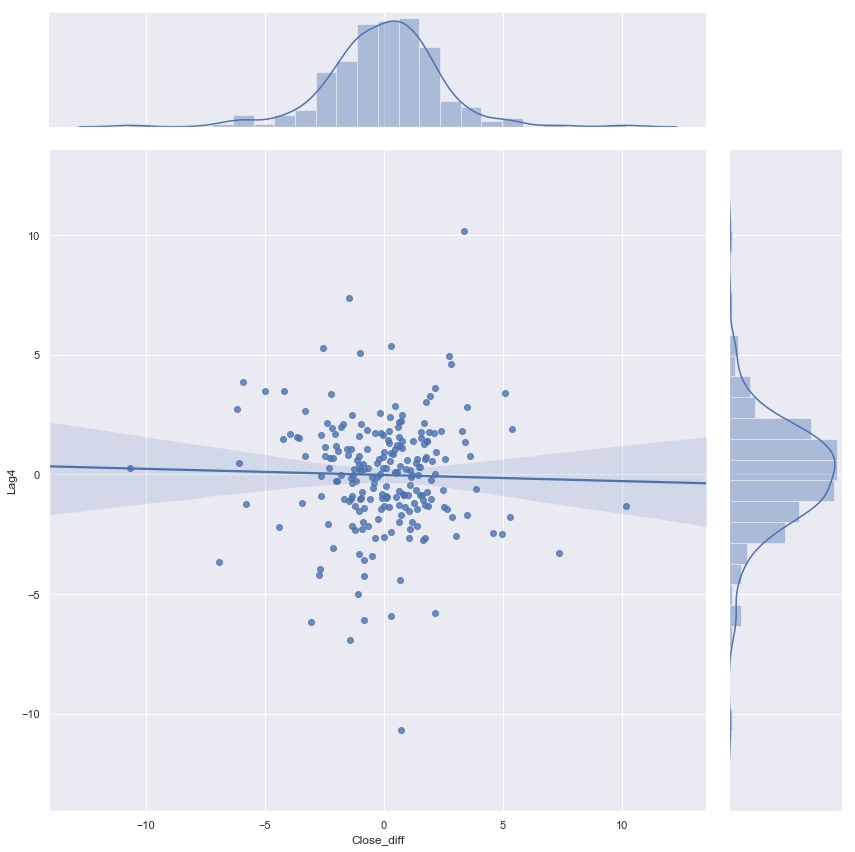

In [23]:
sb.jointplot('Close_diff', 'Lag4', DF, kind='reg', size=12)



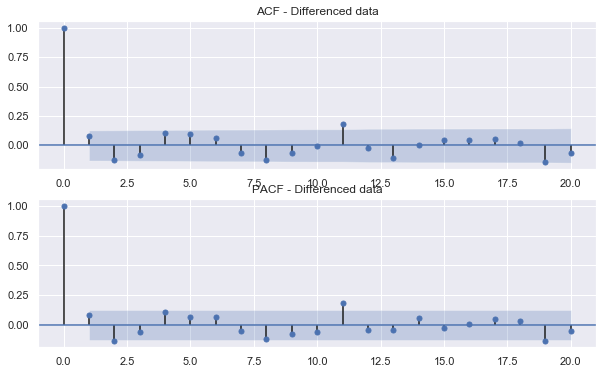

In [24]:
fig, ax = plt.subplots(2)
ax[0] = plot_acf(DF['Close_diff'].fillna(0), ax=ax[0], lags=20, title="ACF - Differenced data")
ax[1] = plot_pacf(DF['Close_diff'].fillna(0), ax=ax[1], lags=20, title="PACF - Differenced data")


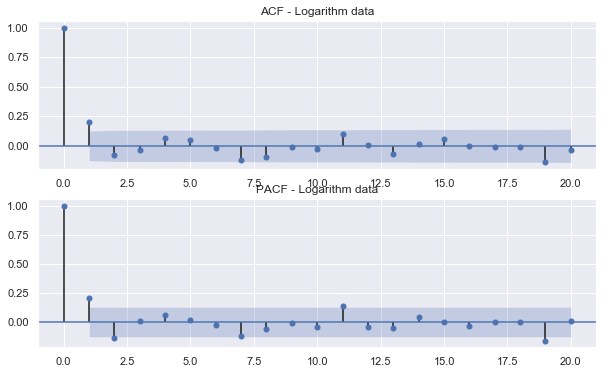

In [25]:
fig, ax = plt.subplots(2)
ax[0] = plot_acf(DF['Close_log'].fillna(0), ax=ax[0], lags=20, title="ACF - Logarithm data")
ax[1] = plot_pacf(DF['Close_log'].fillna(0), ax=ax[1], lags=20, title="PACF - Logarithm data")

<Figure size 720x432 with 0 Axes>

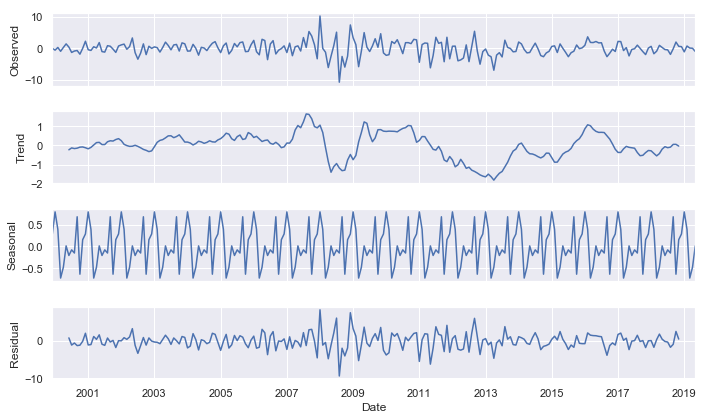

In [26]:
decomposition = seasonal_decompose(DF['Close_diff'].fillna(0), freq=12)
fig = plt.figure()
fig = decomposition.plot()

# Since we don't see any real cycle in the data, the visualization is not that effective in this case
# there might be some seasonality in my time-series object.

In [27]:
X = DF[['Close', 'Close_diff', 'Close_log', 'Sub_Close_diff_MA', 
        'EWA_remove', 'Lag1', 'Lag2', 'Lag3','Lag4']].fillna(0)

X.head(15) # sanity check


,Close,Close_diff,Close_log,Sub_Close_diff_MA,EWA_remove,Lag1,Lag2,Lag3,Lag4
Date,,,,,,,,,
1999-12-31,17.687500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-01-31,17.115625,-0.571875,-0.031080,-0.571875,0.000000,0.000000,0.000000,0.000000,0.000000
2000-02-29,17.390625,0.275000,0.015066,0.275000,0.411212,-0.571875,0.000000,0.000000,0.000000
2000-03-31,16.448370,-0.942255,-0.052595,-0.942255,-0.521702,0.275000,-0.571875,0.000000,0.000000
2000-04-30,16.717105,0.268736,0.015284,0.268736,0.501761,-0.942255,0.275000,0.000000,0.000000
2000-05-31,18.116477,1.399372,0.076020,1.399372,1.267157,0.268736,-0.942255,0.000000,0.000000
2000-06-30,18.511359,0.394882,0.020446,0.394882,0.212333,1.399372,0.268736,-0.571875,0.000000
2000-07-31,17.209375,-1.301984,-0.069060,-1.301984,-1.234006,0.394882,1.399372,0.275000,0.000000
2000-08-31,16.356657,-0.852718,-0.047960,-0.852718,-0.665715,-1.301984,0.394882,-0.942255,0.000000


# Prediction process

In [38]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(DF.Close.fillna(0), start_p=1, start_q=1,
                           max_p=15, max_q=15, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

# The resulting best model parameters gave us an AIC value of 1040.88

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1042.365, BIC=1059.356, Fit time=2.567 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1168.942, BIC=1175.738, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1117.860, BIC=1131.452, Fit time=0.525 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1041.105, BIC=1054.698, Fit time=1.332 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1042.926, BIC=1059.917, Fit time=2.885 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1170.422, BIC=1180.616, Fit time=0.166 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1042.896, BIC=1059.887, Fit time=4.671 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1044.957, BIC=1065.346, Fit time=6.608 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1041.130, BIC=1051.325, Fit time=1.384 seconds
Fit ARIMA: order=(0, 1, 2) s

# ARIMA model

                             ARIMA Model Results                              
Dep. Variable:            D.Close_log   No. Observations:                  232
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 247.499
Method:                       css-mle   S.D. of innovations              0.082
Date:                Tue, 18 Jun 2019   AIC                           -486.998
Time:                        23:11:36   BIC                           -473.211
Sample:                    02-29-2000   HQIC                          -481.438
                         - 05-31-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -8.829e-05   9.99e-05     -0.883      0.378      -0.000       0.000
ma.L1.D.Close_log    -0.7509      0.067    -11.131      0.000      -0.883      -0.619
ma.L2.D.Close_log    -0.

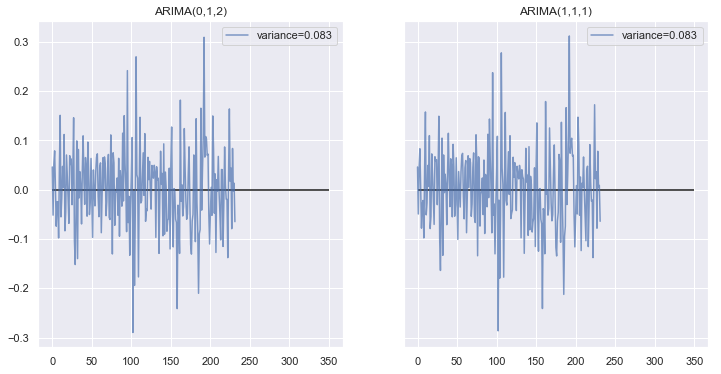

In [36]:
from statsmodels.tsa.arima_model import ARIMA
model1 = ARIMA(DF.Close_log.dropna(), (0, 1, 2))
result_01 = model1.fit()
print(result_01.summary())

model2 = ARIMA(DF.Close_log.dropna(), (1, 1, 1))
result_02 = model2.fit()
print(result_02.summary())

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax[0].plot(result_01.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(result_01.resid.values)))
ax[0].hlines(0, xmin=0, xmax=350)
ax[0].set_title("ARIMA(0,1,2)")
ax[0].legend()
ax[1].plot(result_02.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(result_02.resid.values)))
ax[1].hlines(0, xmin=0, xmax=350)
ax[1].set_title("ARIMA(1,1,1)")
ax[1].legend()

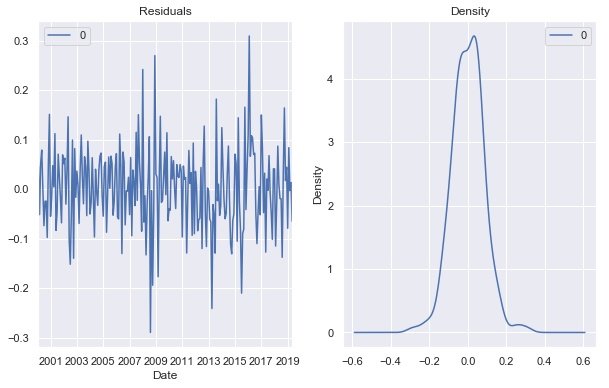

In [61]:
# plotting the residuals to ensure there are no patterns

# Plot residual errors
residuals = pd.DataFrame(result_01.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# The residual errors look fine with zero mean and uniform variance.

# Train Test Split

In [28]:
DF.Close.size


234

In [83]:
train = DF.Close.loc['2000-01-01':'2018-12-31']
test = DF.Close.loc['2019-01-01':]
predictions = []

In [30]:
train.head(2)

Date
2000-01-31    17.115625
2000-02-29    17.390625
Freq: M, Name: Close, dtype: float64

In [40]:
test.size

5

In [46]:
ARIMA_model = ARIMA(train, order = (0,1,2))
ARIMA_model_fit = ARIMA_model.fit()
print(ARIMA_model_fit.aic)

1033.0445167736402


In [47]:
predictions = ARIMA_model_fit.forecast(steps=5)[0] # prediction of last 5 values 
predictions

array([13.51701042, 13.44041633, 13.4246787 , 13.40894107, 13.39320345])

In [58]:
DF.Close.tail() # fact check with original values

Date
2019-01-31    12.417143
2019-02-28    13.139474
2019-03-31    13.229048
2019-04-30    13.243810
2019-05-31    12.241429
Freq: M, Name: Close, dtype: float64

In [64]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mean_squared_error(test,predictions)

0.5384800870260331

In [66]:
rms = sqrt(mean_squared_error(test, predictions))
rms

0.7338120243127889

In [72]:
test # test values for cross check with predicted values

Date
2019-01-31    12.417143
2019-02-28    13.139474
2019-03-31    13.229048
2019-04-30    13.243810
2019-05-31    12.241429
Freq: M, Name: Close, dtype: float64

In [74]:
# converting prediction values to series
predictions_series = pd.Series(predictions, index=['2010-01-31', '2019-02-28', '2019-03-31',
                                                  '2019-04-30', '2019-05-31'])
predictions_series

2010-01-31    13.517010
2019-02-28    13.440416
2019-03-31    13.424679
2019-04-30    13.408941
2019-05-31    13.393203
dtype: float64

# Seasonal ARIMA

In [55]:
import statsmodels.api as sm
import pmdarima as pm
SARIMAX_model = sm.tsa.statespace.SARIMAX(DF.Close_log, order=(0, 1, 2),
                                  seasonal_order=(0, 1, 1, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

results = SARIMAX_model.fit()

print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Close_log   No. Observations:                  234
Model:             SARIMAX(0, 1, 2)x(0, 1, 1, 12)   Log Likelihood                 200.614
Date:                            Wed, 19 Jun 2019   AIC                           -393.227
Time:                                    00:34:53   BIC                           -379.916
Sample:                                12-31-1999   HQIC                          -387.844
                                     - 05-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7538     46.006     -0.016      0.987     -90.923      89.416
ma.L2         -0.2463     11.305   

C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


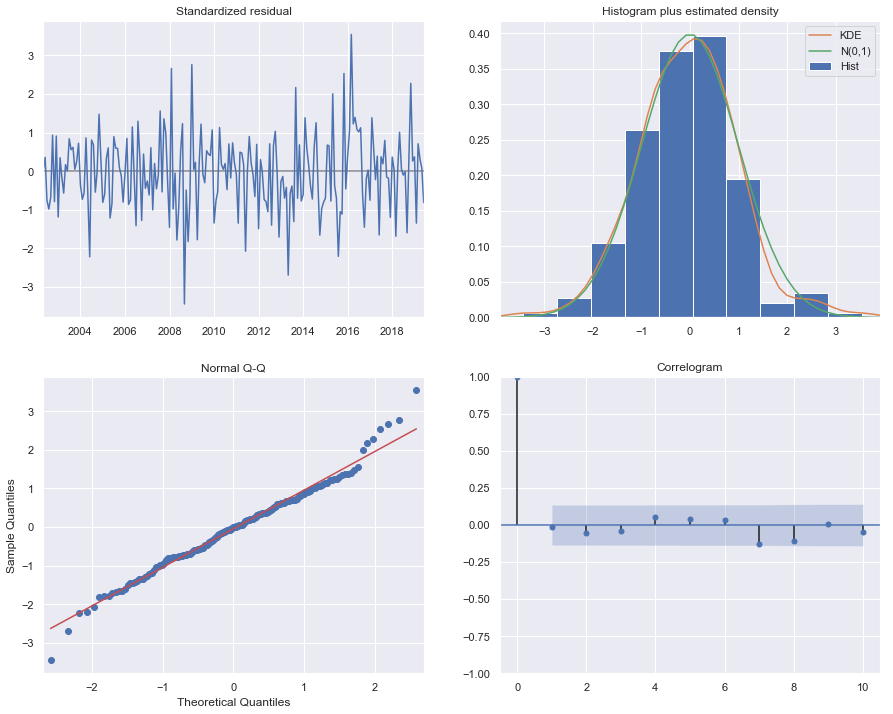

In [56]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
In similar ARIMA process, SARIMAX model can be used for predictions too.

# Linear regression with added features

In [99]:
X.head(2)

,Close,Close_diff,Close_log,Sub_Close_diff_MA,EWA_remove,Lag1,Lag2,Lag3,Lag4
Date,,,,,,,,,
1999-12-31,17.687500,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
2000-01-31,17.115625,-0.571875,-0.03108,-0.571875,0.0,0.0,0.0,0.0,0.0


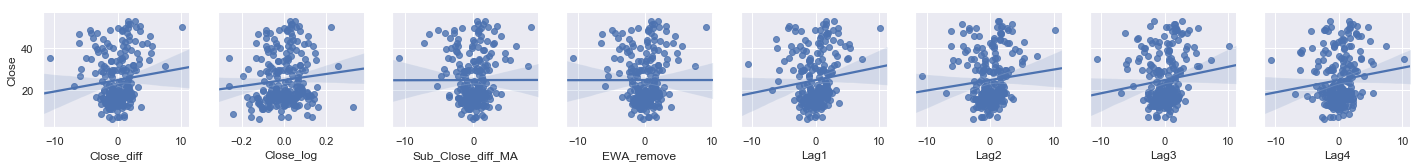

In [108]:
sns.pairplot(X, x_vars = ['Close_diff','Close_log','Sub_Close_diff_MA','EWA_remove','Lag1','Lag2','Lag3','Lag4'],
            y_vars ='Close',kind= 'reg')

# kind= ‘reg’ attempts to add line of best fit and a 95% confidence band. My aim is to minimize sum of squared error

In [107]:
# I will be using the columns except 'Close' as predictor variables and "Close" as response variable

# Assigning feature columns as list:features
features = ['Close_diff', 'Close_log', 'Sub_Close_diff_MA', 'EWA_remove', 'Lag1',
            'Lag2', 'Lag3', 'Lag4']
    
# Assigning to x a subset of data includes only features columns
x = X[features]

In [109]:
# assigning y response variable
y = X['Close']

In [117]:
# Splitting X & y into training and testing sets. By passing X and y variables into the train_test_split method, 
# we are able to capture the splits in data by assigning 9 variables to the result.
from sklearn.model_selection import train_test_split

# Split the data into 90% training and 10% testing
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print('length of X_train and x_test: ', len(X_train), len(X_test))


length of X_train and x_test:  210 24


In [118]:
from sklearn.linear_model import LinearRegression

Linreg = LinearRegression() # instantiate

# fit model to training data
Linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [121]:
# The coefficients will allow us to model our equation with values for our beta’s. 

print(Linreg.intercept_) # print y intercept
print(Linreg.coef_) # print beta coefficient
zip(features, Linreg.coef_)

3.552713678800501e-14
[ 1.00000000e+00 -1.29428679e-15  1.29428320e-14  3.50919176e-16
  4.86777106e-16  1.88814633e-16 -1.58733503e-16 -9.51050974e-17
 -2.96898926e-16]


In [124]:
Predictions = Linreg.predict(X_test)
print(Predictions)

[13.335      39.910952   17.0444999   7.47863636 46.65666633 12.096
 37.99999986 26.6686957  47.9570001  32.54000004 44.38590955 35.15857148
 52.81750005 33.82142876 24.20368411 16.35665652 26.19333329 17.03652157
 43.8972725  18.11647727 12.55578947 18.67476205 29.008      49.73666662]


In [128]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, Predictions)) # MAE: Represents average error
print(np.sqrt(metrics.mean_absolute_error(y_test, Predictions))) # RMSE

1.7356486618306615e-14
1.3174401928856815e-07
